# Informasi Data

Sumber data : https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset
1. Atribut data :
2. pregnancies: Berapa kali hamil
3. Glucose: Konsentrasi glukosa plasma selama 2 jam dalam tes toleransi glukosa oral
4. BloodPressure: Tekanan darah diastolik (mm Hg)
5. SkinThiness: Ketebalan lipatan kulit trisep (mm)
6. Insulin: Insulin serum 2 jam (mu U/ml)
7. BMI: Indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2)
8. DiabetesPedigreeFunction: Fungsi silsilah diabetes
9. Age: Usia (tahun)
10. Outcome: Variabel kelas (0 atau 1)

### Read Data

In [20]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data = 'Data/'
data_set_csv = pd.read_csv(data + 'diabetes.csv')
data_set_csv.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Cleaning Data

In [22]:
df = data_set_csv

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Handling Missing Values

In [24]:
df['BMI'] = df['BMI'].astype('int')
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype('int')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int64
 1   Glucose                   768 non-null    int64
 2   BloodPressure             768 non-null    int64
 3   SkinThickness             768 non-null    int64
 4   Insulin                   768 non-null    int64
 5   BMI                       768 non-null    int32
 6   DiabetesPedigreeFunction  768 non-null    int32
 7   Age                       768 non-null    int64
 8   Outcome                   768 non-null    int64
dtypes: int32(2), int64(7)
memory usage: 48.1 KB


### Visualisasi Data

#### 1. Bar Chart

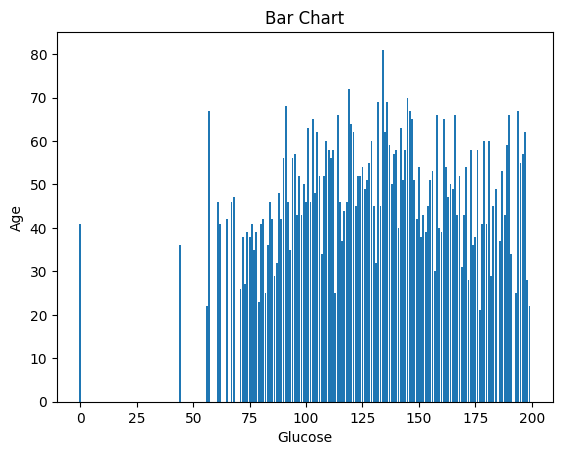

In [26]:
plt.bar(df['Glucose'], df['Age'])
plt.title('Bar Chart')

plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()

#### 2. Scatter 

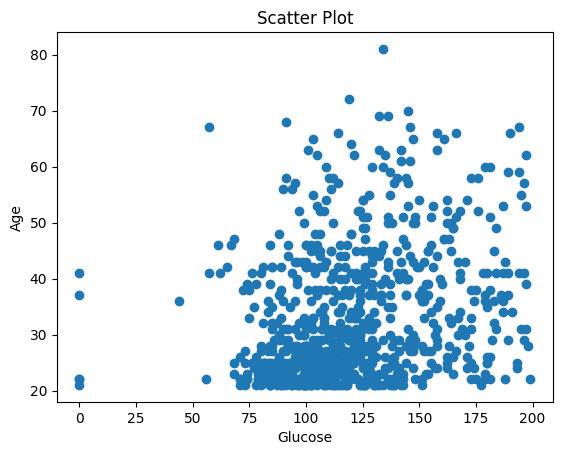

In [27]:
plt.scatter(df['Glucose'], df['Age'])
plt.title('Scatter Plot')

plt.xlabel('Glucose')
plt.ylabel('Age')
plt.show()

#### 3. Histogram

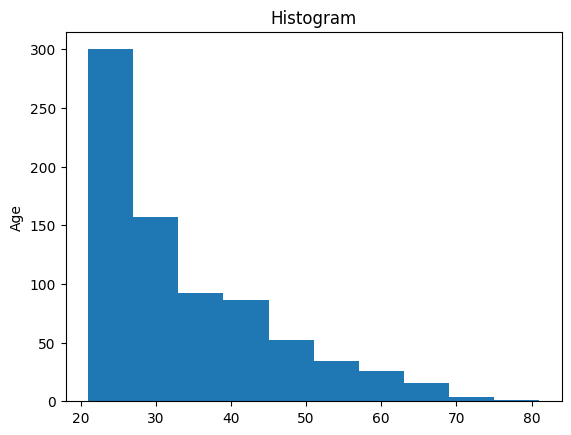

In [28]:
plt.hist(df['Age'])
plt.title('Histogram')

plt.ylabel('Age')
plt.show()

### Create Variabel X dan Y 

In [29]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

### Split Data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Pengujian Metode

#### A. Clasifikasi

#### 1. KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

knn_method = KNeighborsClassifier()
knn_method.fit(x_train, y_train)
knn_predic = knn_method.predict(x_test)

accuracy = metrics.accuracy_score(knn_predic, y_test)

print('Akurasi metode KNN:', round(accuracy,8), ' atau ', round(accuracy*100,2), '%', sep='')

Akurasi metode KNN:0.75324675 atau 75.32%


#### 2. DecisionTree

In [33]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

tree_method = DecisionTreeClassifier()
tree_method.fit(x_train, y_train)
tree_predic = tree_method.predict(x_test)

accuracy_tree = metrics.accuracy_score(tree_predic, y_test)

print('Akurasi metode Tree:', round(accuracy_tree,8), ' atau ', round(accuracy_tree*100,2), '%', sep='')

Akurasi metode Tree:0.71428571 atau 71.43%


#### 3. Naive Bayes

In [34]:
from sklearn import naive_bayes
import sklearn.metrics as metrics

bayes_method = naive_bayes.BernoulliNB()
bayes_method.fit(x_train, y_train)
bayes_predic = bayes_method.predict(x_test)

accuracy_bayes = metrics.accuracy_score(bayes_predic, y_test)

print('Akurasi metode Bayes:', round(accuracy_bayes,8), ' atau ', round(accuracy_bayes*100,2), '%', sep='')

Akurasi metode Bayes:0.7012987 atau 70.13%


### B. Regresi

#### 1. MSE

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import sklearn.metrics as met

reg_method = LinearRegression()
reg_method.fit(x_train, y_train)
reg_predic = reg_method.predict(x_test)

print("MSE:",mean_squared_error(y_test, reg_predic))

MSE: 0.1481212313858091


#### 2. MAE

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import sklearn.metrics as met

reg_method = LinearRegression()
reg_method.fit(x_train, y_train)
reg_predic = reg_method.predict(x_test)

print("MAE:",mean_absolute_error(y_test, reg_predic))

MAE: 0.3237520188672359


#### 3. R2 

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import sklearn.metrics as met

reg_method = LinearRegression()
reg_method.fit(x_train, y_train)
reg_predic = reg_method.predict(x_test)

print("r2_score:",met.r2_score(y_test, reg_predic))

r2_score: 0.301482775194701
